<Axes: >

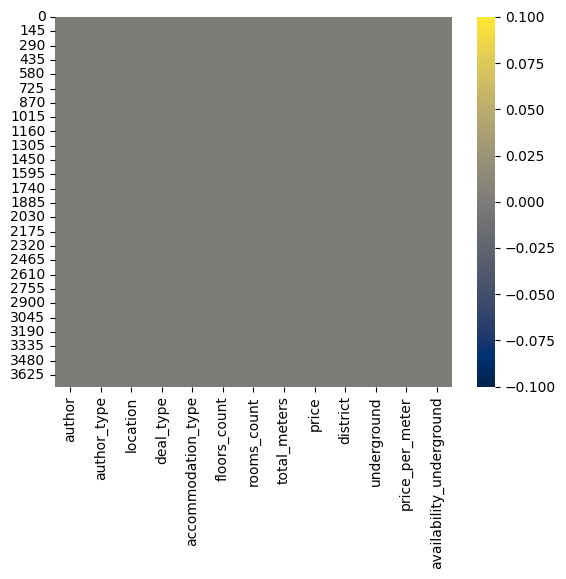

In [34]:
import pandas as pd
import seaborn as sns


base = 'result.csv'

zxc = pd.read_csv(base)
sns.heatmap(zxc.isnull(),cmap='cividis')

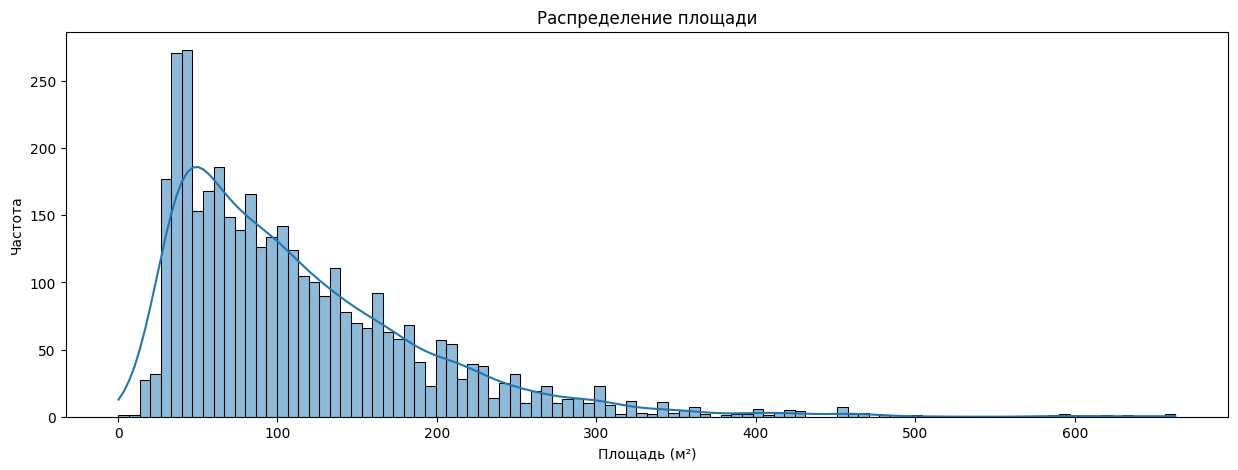

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

zxc.describe()

plt.figure(figsize=(15, 5))
sns.histplot(zxc['total_meters'], bins=100, kde=True)
plt.title('Распределение площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Частота')
plt.show()

In [36]:
import pandas as pd


print(zxc['author_type'].value_counts())
print('-------------------------------------------------')
print(zxc['rooms_count'].value_counts())

author_type
real_estate_agent           2429
developer                    923
realtor                      276
homeowner                     87
representative_developer      15
official_representative       14
Name: count, dtype: int64
-------------------------------------------------
rooms_count
 3    932
 4    774
 1    757
 5    672
 2    607
-1      2
Name: count, dtype: int64


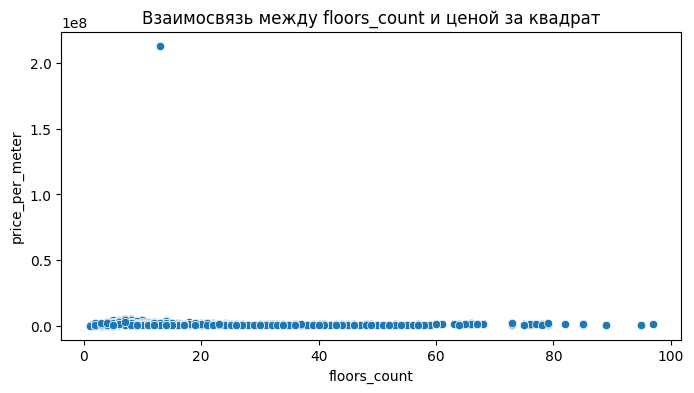

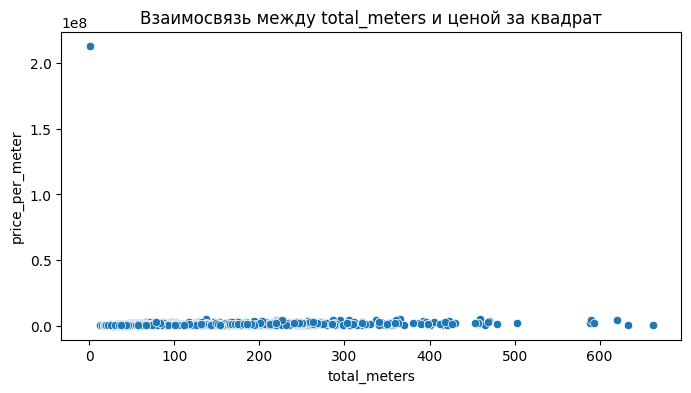

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


columns_to_plot = ['floors_count','total_meters']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=zxc, x=column, y='price_per_meter')
    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.ylabel('price_per_meter')
    plt.show()



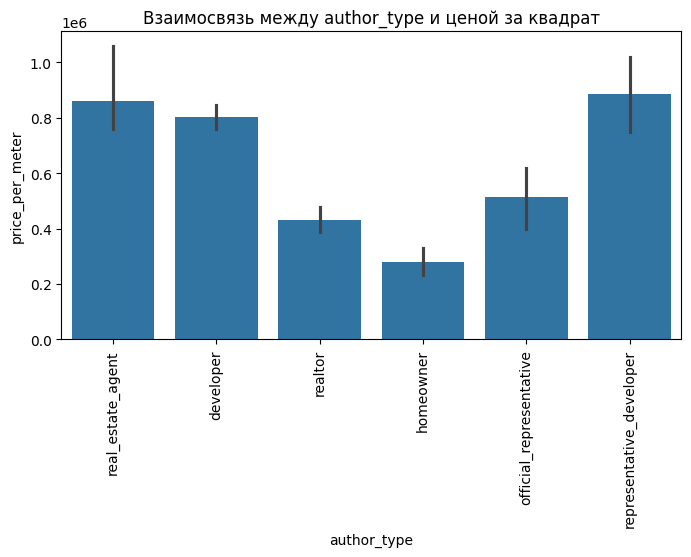

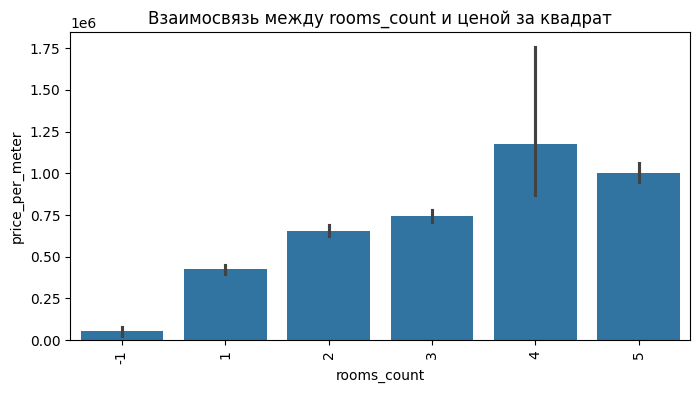

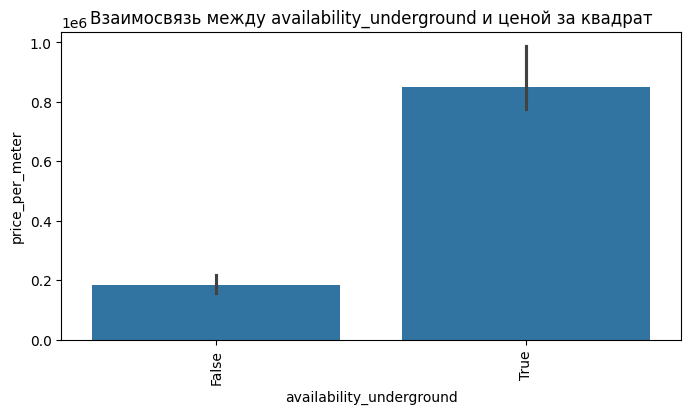

In [42]:
columns_to_plot = ['author_type','rooms_count','availability_underground']

for column in columns_to_plot:
    plt.figure(figsize=(8, 4))

    sns.barplot(data=zxc, x=column, y='price_per_meter')

    plt.title(f'Взаимосвязь между {column} и ценой за квадрат')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('price_per_meter')

    plt.show()



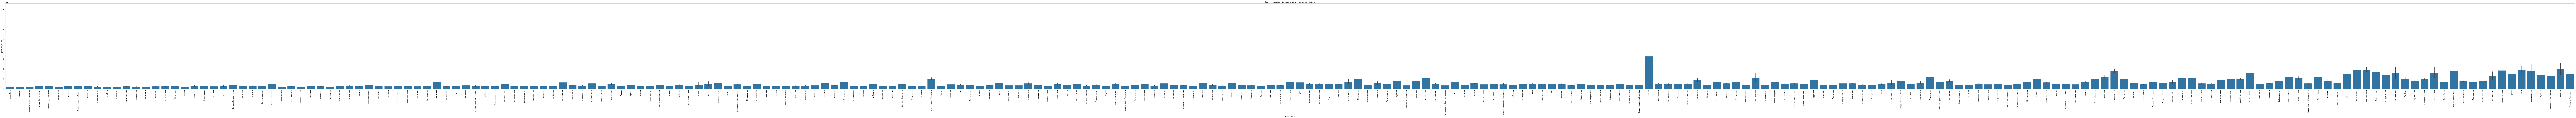

In [39]:
plt.figure(figsize=(300, 10))

sns.barplot(data=zxc, x='underground', y='price_per_meter', order=zxc.sort_values('price_per_meter').underground)

plt.title('Взаимосвязь между underground и ценой за квадрат')
plt.xlabel('underground')
plt.xticks(rotation=90)
plt.ylabel('price_per_meter')

plt.show()

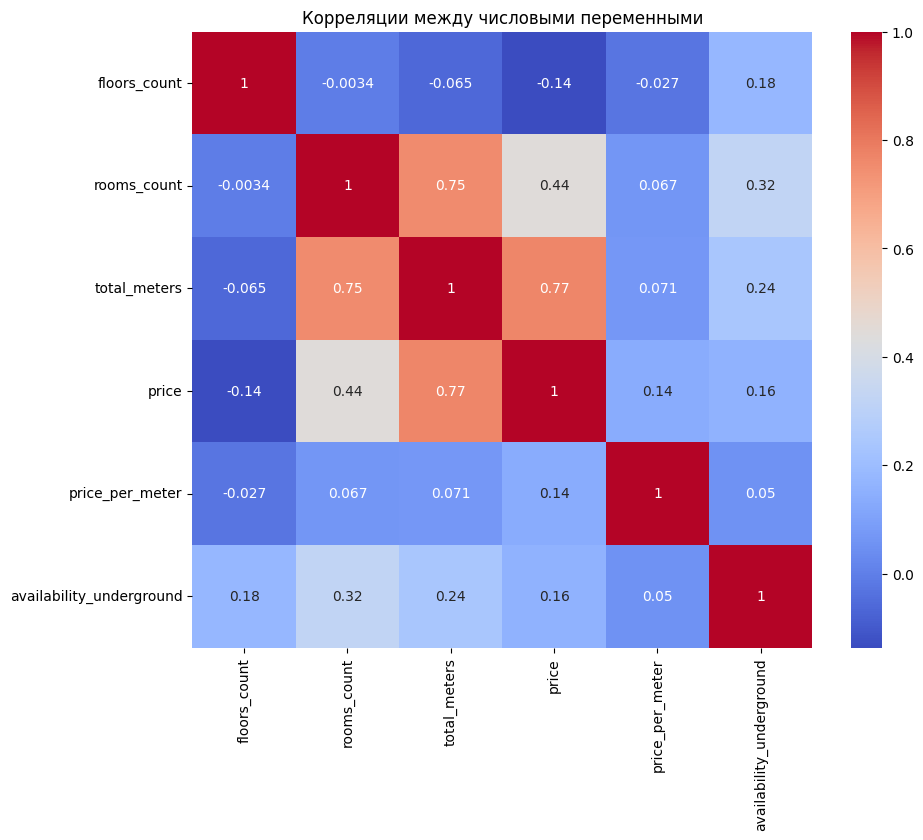

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


numeric_df = zxc.select_dtypes(include=['float64', 'int64', 'bool'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()